# The Kolmogorov-Smirnov Test - Lab

## Introduction
In the previous lesson, we saw that the Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. In this lab, we shall see how to perform this test in Python. 

## Objectives

In this lab you will:

- Calculate a one- and two-sample Kolmogorov-Smirnov test
- Interpret the results of a one- and two-sample Kolmogorov-Smirnov test
- Compare K-S test to visual approaches for testing for normality assumption

### Data

Let's import the necessary libraries and generate some data. Run the following cell: 

In [1]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns
from matplotlib.gridspec import GridSpec

# Create the normal random variables with mean 0, and sd 3
x_10 = stats.norm.rvs(loc=0, scale=3, size=10)
x_50 = stats.norm.rvs(loc=0, scale=3, size=50)
x_100 = stats.norm.rvs(loc=0, scale=3, size=100)
x_1000 = stats.norm.rvs(loc=0, scale=3, size=1000)

### Plots 

Plot histograms and Q-Q plots of above datasets and comment on the output 

- How good are these techniques for checking normality assumptions?
- Compare both these techniques and identify their limitations/benefits etc. 


/Users/stevencontreras/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


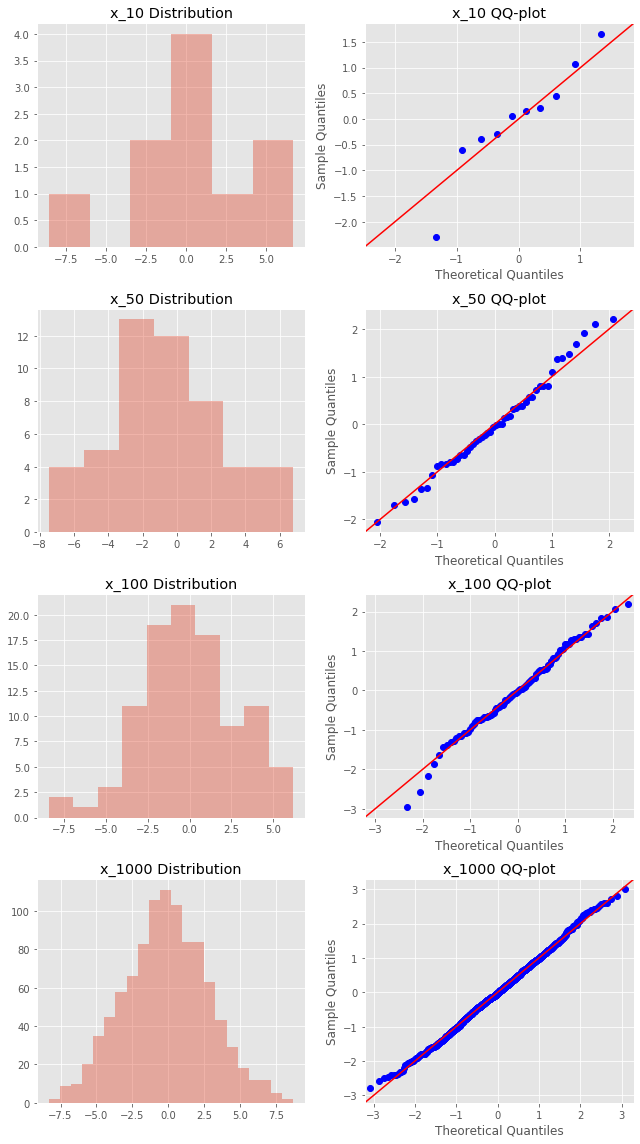

In [2]:
# Plot histograms and Q-Q plots for above datasets

spds = [x_10, x_50, x_100, x_1000]
spds_titles = ['x_10', 'x_50', 'x_100', 'x_1000']

plot_edge = 4
fig = plt.figure(constrained_layout=True, figsize=(2.25*plot_edge,4*plot_edge))
gs = GridSpec(len(spds), 2, figure=fig)

for idx, spd in enumerate(spds):
    ax_hist = fig.add_subplot(gs[idx, 0])
    #ax_hist.hist(spd)
    sns.distplot(spd, kde=False, ax=ax_hist)
    ax_hist.set_title(spds_titles[idx] + ' Distribution')

    ax_qq = fig.add_subplot(gs[idx, 1])
    sm.graphics.qqplot(spd, dist=stats.norm, line='45', fit=True, ax=ax_qq)
    ax_qq.set_title(spds_titles[idx] + ' QQ-plot')

fig.tight_layout()
plt.show();

In [3]:
# Your comments here 

# Using ONLY histograms to get a feel for whether or not data is distributed normallys generally not a good idea, especially since the "shape" can be dependent on the number of data points, as seen above.
# Each set above is sources from the same distribution generator and, as we see when referencing the histograms alone, the plots can be misleading since, based only on visualization, we do not have a feel for the size of the data set.  
# Additionally, we see that, of course, as the size of data sets sourced from the stats.norm.rvs distribution generator increases - all things being equal (e.g. mean and std) - the visualization presents more and more normality
# However, combining histograms with QQ-plots provides a very good feel for the distributions.
# Take, for example, the data set with only 10 observations in it; the histogram alone seems to indicate that data is not normally distributed (even though it is sourced from a normal distribution generator); however, the QQ-plot indicates a more-or-less normal distribution
# Finally, a QQ-plot is also valuable since it provides a feel for kurtosis and outliers, by inspecting behavior at the tails of the plot. 

### Create a function to plot the normal CDF and ECDF for a given dataset
- Create a function to generate an empirical CDF from data
- Create a normal CDF using the same mean = 0 and sd = 3, having the same number of values as data

In [4]:
# You code here 
def ks_plot(data, e_params, t_params=(0,3)):
    """
    An empirical cumulative distribution function (CDF) is a non-parametric estimator of the underlying CDF of a random variable. 
    It assigns a probability to each data point, orders the data from smallest to largest in value, and calculates the sum of the assigned probabilities up to and including each data point.
    """

    # first generate the theoretical normal distribution (of the same size of our empiracal data)
    theoretical = stats.norm.rvs(loc=t_params[0], scale=t_params[1], size=len(data))

    #According to the lecture, "we sort the combined sample, in order to compute the empirical cdfs"
    # so now combine empiracal with theoretical and then sort
    combined_sorted = np.sort(np.append(data, theoretical))

    #now compute the CDFs from the combined domain
    F_empiracal = []
    F_theoretical = []
    for csv in combined_sorted:
        p_obs_lte_csv__empiracal = len(np.where(data<=csv)[0])/len(data) #count of empiracal observations <= current sorted combined value, divided by total number of empiracal observations 
        F_empiracal.append(p_obs_lte_csv__empiracal)

        p_obs_lte_csv__theoretical = len(np.where(theoretical<=csv)[0])/len(theoretical) #count of empiracal observations <= current sorted combined value, divided by total number of empiracal observations 
        F_theoretical.append(p_obs_lte_csv__theoretical)

    # now we can actually create the plots: the CDFs (F-values) are the y-values of the plot, while the x-values are observed values
    fig = plt.figure(figsize=(12,10))
    X_empiracal = X_theoretical = combined_sorted # common domain
    Y_empiracal = F_empiracal
    Y_theoretical = F_theoretical
    plt.plot(X_empiracal, Y_empiracal, label=f"Empiracal CDF ($\mu={e_params[0]}, \sigma={e_params[1]}$)", color='red')
    plt.plot(X_theoretical, Y_theoretical, label=f"Theoretical CDF ($\mu={t_params[0]}, \sigma={t_params[1]}$)", color='blue')
    
    plt.legend()
    plt.title(f"Empiracal CDF ($\mu={e_params[0]}, \sigma={e_params[1]}$) vs Theoretical CDF ($\mu={t_params[0]}, \sigma={t_params[1]}$), Sample Size: {len(data)}")
    plt.show();

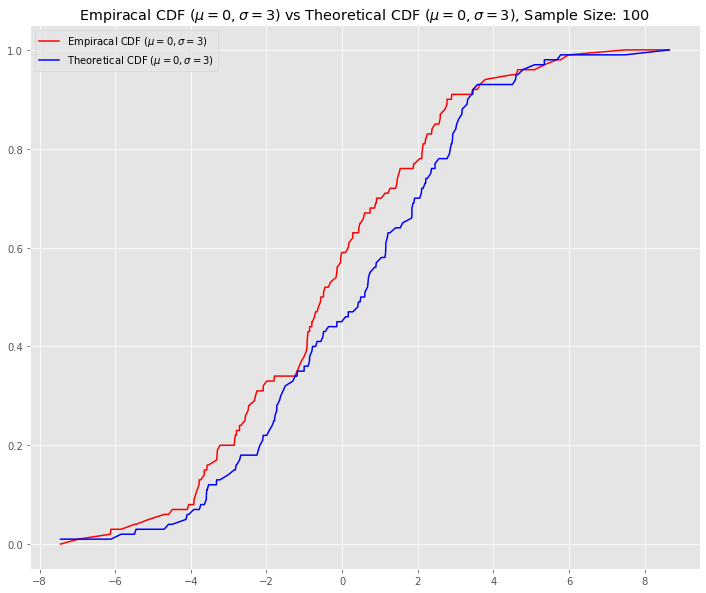

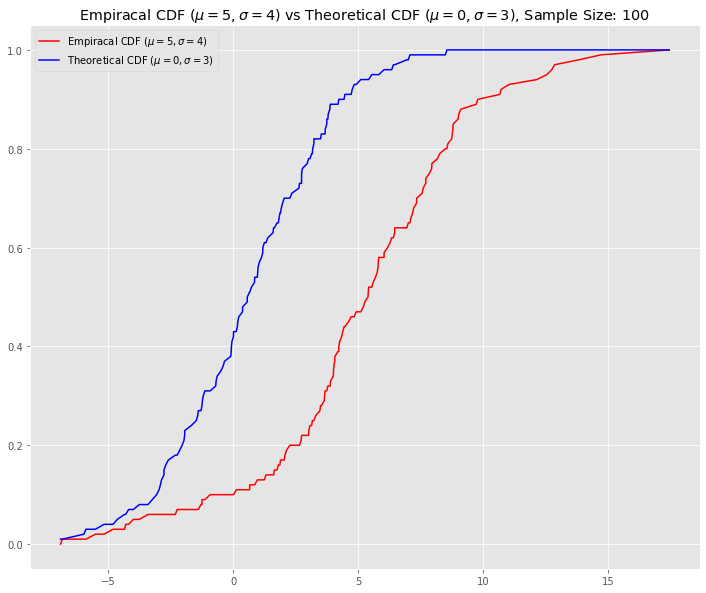

In [5]:
e_params=(0,3)
ks_plot(stats.norm.rvs(loc=e_params[0], scale=e_params[1], size=100), e_params)

e_params=(5,4)
ks_plot(stats.norm.rvs(loc=5, scale=4, size=100), e_params)

This is awesome. The difference between the two CDFs in the second plot shows that the sample did not come from the distribution which we tried to compare it against. 

Now you can run all the generated datasets through the function `ks_plot()` and comment on the output.

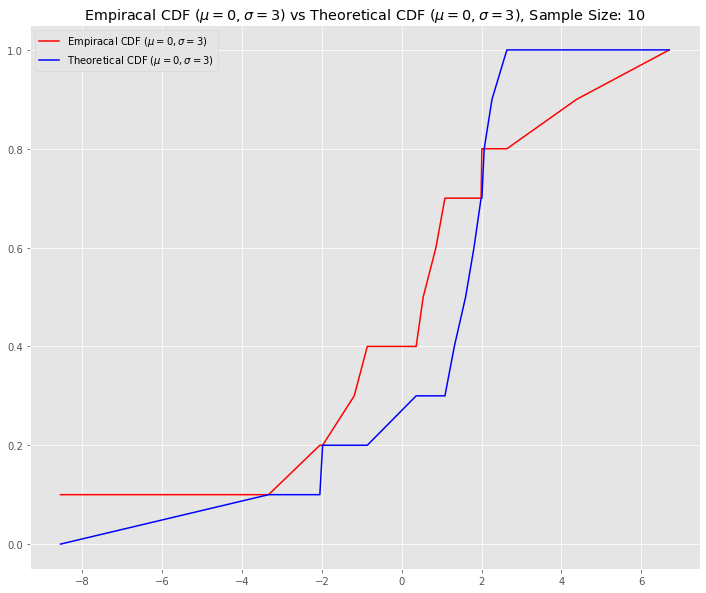

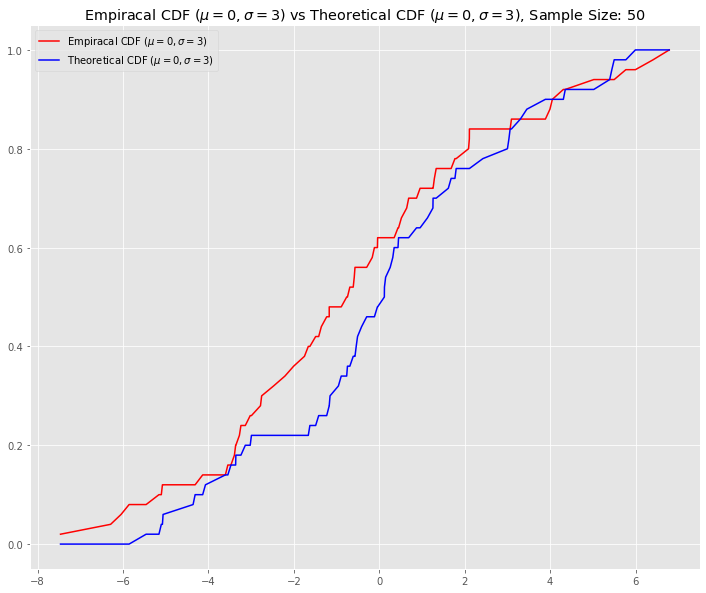

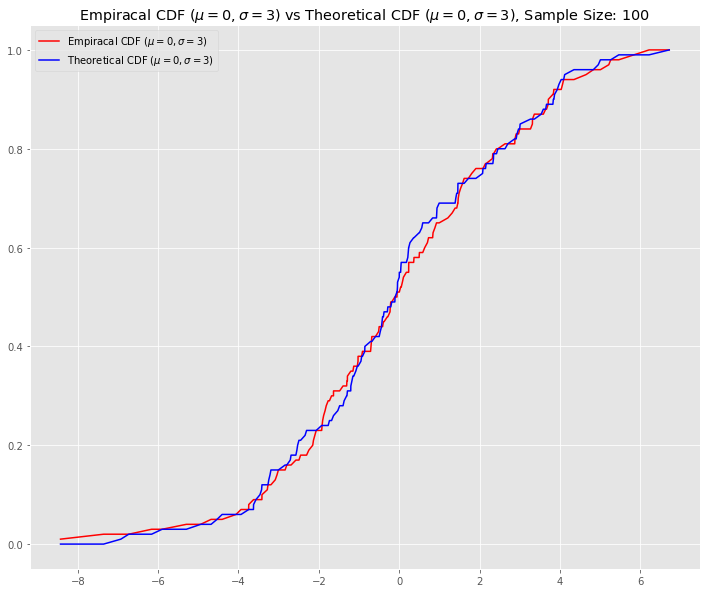

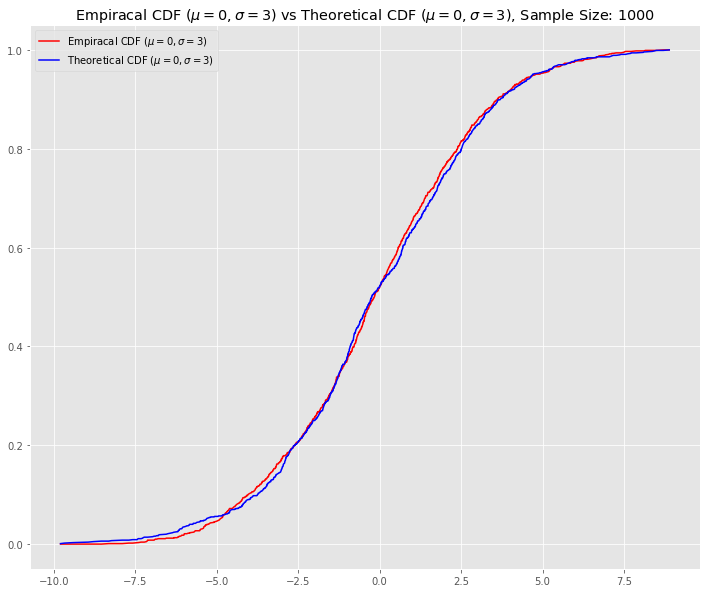

In [6]:
e_params=(0,3)
for idx, spd in enumerate(spds):
    ks_plot(spd, e_params)

In [7]:
# Your comments here 

# knowing beforehand that both theoretical and empiracal distributions were both generated to have the same distribution, we should expect both plots to be close to one another, but this "closeness" depends on the sample size
# in this sense, we get similar information to that output by analyzing the combination of histogram and QQ-plot, however it is clear that we can analytically provide a more precise (read: mathematical) justification for either accepting or rejecting the null hypothesis based on the maximum delta y-value from above

### K-S test in SciPy

Let's run the Kolmogorov-Smirnov test, and use some statistics to get a final verdict on normality. We will test the hypothesis that the sample is a part of the standard t-distribution. In SciPy, we run this test using the function below:

```python
scipy.stats.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', mode='approx')
```
Details on arguments being passed in can be viewed at this [link to the official doc.](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html)

Run the K-S test for normality assumption using the datasets created earlier and comment on the output: 
- Perform the K-S test against a normal distribution with mean = 0 and sd = 3
- If p < .05 we can reject the null hypothesis and conclude our sample distribution is not identical to a normal distribution 

In [8]:
# Perform K-S test 
# Your code here
for idx, spd in enumerate(spds):
    print(stats.kstest(spd, 'norm', args=e_params))

# KstestResult(statistic=0.1377823669421559, pvalue=0.9913389045954595)
# KstestResult(statistic=0.13970573965633104, pvalue=0.2587483380087914)
# KstestResult(statistic=0.0901015276393986, pvalue=0.37158535281797134)
# KstestResult(statistic=0.030748345486274697, pvalue=0.29574612286614443)

KstestResult(statistic=0.17104394547431612, pvalue=0.9316715729383162)
KstestResult(statistic=0.13530955401478384, pvalue=0.2930132218593376)
KstestResult(statistic=0.046579349356496935, pvalue=0.9817439535906566)
KstestResult(statistic=0.02657196634460246, pvalue=0.4787313379918726)


In [9]:
# Your comments here 

# there is no p-value < 0.05, therefore we cannot reject the null hypothesis (that our sample distribution is identical to a normal distribution)

Generate a uniform distribution and plot / calculate the K-S test against a uniform as well as a normal distribution: 

In [10]:
x_uni = np.random.rand(1000)
# Try with a uniform distribution

print(stats.kstest(x_uni, 'uniform'))
print(stats.kstest(x_uni, 'norm'))

# KstestResult(statistic=0.023778383763166322, pvalue=0.6239045200710681)
# KstestResult(statistic=0.5000553288071681, pvalue=0.0)

KstestResult(statistic=0.02116242060826079, pvalue=0.7616800192984011)
KstestResult(statistic=0.5003850502891709, pvalue=4.421316325233471e-232)


In [11]:
# Your comments here 

# from p-value of ks-test executed against the random distribution using a uniform cdf, we fail to reject the null hypothesis
# from p-value of ks-test executed against the random distribution using a normal cdf, we can reject the null hypothesis

## Two-sample K-S test

A two-sample K-S test is available in SciPy using following function: 

```python 
scipy.stats.ks_2samp(data1, data2)[source]
```

Let's generate some bi-modal data first for this test: 

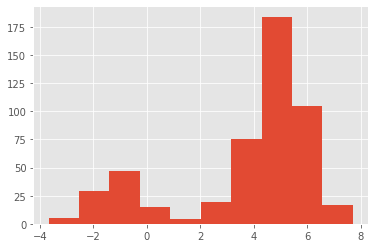

In [12]:
# Generate binomial data
N = 1000
x_1000_bi = np.concatenate((np.random.normal(-1, 1, int(0.1 * N)), np.random.normal(5, 1, int(0.4 * N))))[:, np.newaxis]
plt.hist(x_1000_bi);

Plot the CDFs for `x_1000_bimodal` and `x_1000` and comment on the output. 

In [13]:
# Plot the CDFs

# base this implemention on ks_plot above since that was actually written as if it were a two-sample ks test anyway (except that one set is theoretical)
def ks_plot_2sample(data_1, data_2):
    '''
    Data entered must be the same size.
    '''

    #According to the lecture, "we sort the combined sample, in order to compute the empirical cdfs"
    # so now combine empiracal with theoretical and then sort
    combined_sorted = np.sort(np.append(data_1, data_2))

    #now compute the CDFs from the combined domain
    F_data_1 = []
    F_data_2 = []
    for csv in combined_sorted:
        p_obs_lte_csv__data_1 = len(np.where(data_1<=csv)[0])/len(data_1) #count of data_1 observations <= current sorted combined value, divided by total number of data_1 observations 
        F_data_1.append(p_obs_lte_csv__data_1)

        p_obs_lte_csv__data_2 = len(np.where(data_2<=csv)[0])/len(data_2) #count of data_2 observations <= current sorted combined value, divided by total number of data_2 observations 
        F_data_2.append(p_obs_lte_csv__data_2)

    # now we can actually create the plots: the CDFs (F-values) are the y-values of the plot, while the x-values are observed values
    fig = plt.figure(figsize=(12,10))
    X_data_1 = X_data_2 = combined_sorted # common domain
    Y_data_1 = F_data_1
    Y_data_2 = F_data_2
    plt.plot(X_data_1, Y_data_1, label=f"Empiracal CDF (of data_1)", color='red')
    plt.plot(X_data_2, Y_data_2, label=f"Empiracal CDF (of data_2)", color='blue')
    
    plt.legend()
    plt.title(f"Empiracal CDF Comparison (data_1 and data_2), Sample Size: {len(combined_sorted)}")
    plt.show();

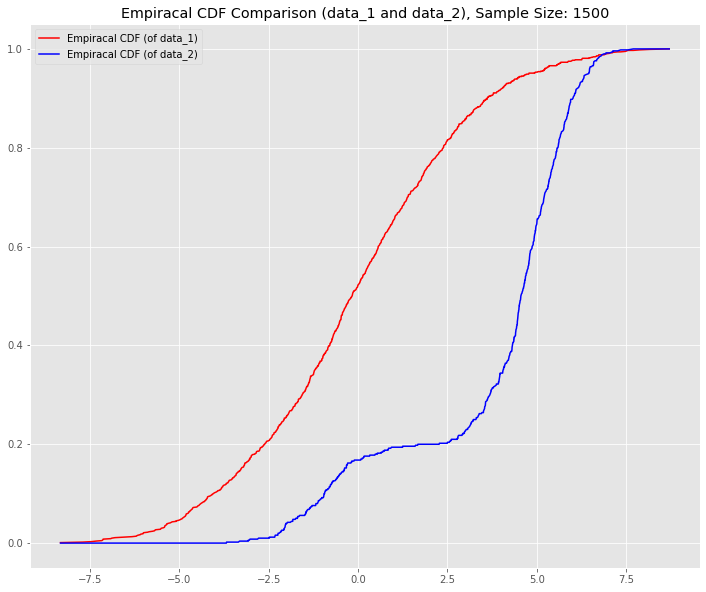

In [14]:
# Uncomment below to run
ks_plot_2sample(x_1000, x_1000_bi[:,0])

In [15]:
# You comments here 

# Visually, it is obvious we can reject the null hypothesis

Run the two-sample K-S test on `x_1000` and `x_1000_bi` and comment on the results. 

In [16]:
# Your code here
#print(stats.kstest(x_uni, 'norm'))
stats.ks_2samp(x_1000, x_1000_bi[:,0])

# Ks_2sampResult(statistic=0.633, pvalue=4.814801487740621e-118)

Ks_2sampResult(statistic=0.635, pvalue=2.9976021664879227e-15)

In [17]:
# Your comments here 
# p-value < 0.05 confirms that we can reject the null hypothesis

## Summary

In this lesson, we saw how to check for normality (and other distributions) using one- and two-sample K-S tests. You are encouraged to use this test for all the upcoming algorithms and techniques that require a normality assumption. We saw that we can actually make assumptions for different distributions by providing the correct CDF function into Scipy K-S test functions. 